# 아마존 제품 리뷰 TDM

Amazon 사용자들이 올린 제품 리뷰를 TDM으로 만들어보자. UCI 머신러닝 리포지토리에서에서 Sentiment Labelled Sentences 데이터를 다운받아 'amazon_cells_labelled.txt'를 사용한다.

https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences

## 파일 다운로드

In [1]:
import requests
res = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip')

In [2]:
with open('sentiment labelled sentences.zip', 'wb') as f: # wb -> w:쓰기, b: 텍스트 파일이 아닌경우 다 b붙인다 생각하면 편함. 
    f.write(res.content)

## 압축 파일 열기

압축 파일에서 `amazon_cells_labelled.txt` 파일을 연다.

In [3]:
from zipfile import ZipFile

In [4]:
z = ZipFile('sentiment labelled sentences.zip') # zip파일을 해제하지 않아도 풀어서 사용할 수 있게 해주는 코드이다. 

In [5]:
data = z.open('sentiment labelled sentences/amazon_cells_labelled.txt')

## 자료 불러오기

아마존 제품 리뷰 자료는 한줄 댓글과 함께 해당 제품에 대한 긍/부정 점수가 1과 0으로 기록되어 있다. 따라서 긍/부정 감정사전을 만드는데 용이하다.

이 자료는 탭으로 구분이 이뤄져있으며, 열마다 제목이 없기 때문에 파일을 읽을 때 `sep="\t"` 옵션과 `header=None` 옵션을 넘겨줘야 한다.

In [6]:
import pandas as pd  

In [7]:
df = pd.read_csv(data, sep="\t", header=None)

자료를 확인해보니, 댓글이 첫번째 열에 들어있으며 감정 분류가 두번째 열에 들어가있다.

In [8]:
df.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [9]:
content = df[0]
sentiment = df[1]

## TDM 만들기

In [10]:
from sklearn.feature_extraction.text import CountVectorizer # TDM 만들어주는 패키지 

먼저 `CountVectorizer`를 생성한다. 여러 가지 옵션을 설정할 수 있는데, 여기서는 `max_features=500`으로 설정한다. 이 옵션은 TDM에서 포함시킬 최대(max)의 단어(feature) 수를 말한다. 즉, 빈도 순으로 최대 500 단어까지만 포함시킨다. `stop_words=`는 분석에서 제외할 불용어를 설정하는 옵션이다. `stop_words=english`로 설정하면 영어의 관사, 전치사 등을 자동으로 제외시킨다. 한국어는 지원하지 않기 때문에 한국어를 분석할 때는 `tokenizer=` 옵션에 형태소 분석 함수를 넘겨줘야 한다.

In [85]:
# 컬럼수 500으로 지정을 해둔다 -> 많이 나온 단어 500개만 사용하겠다는 의미이다. 
cv = CountVectorizer(max_features=500, stop_words='english') # cv에 단어 목록이 들어있음. 

In [86]:
tdm = cv.fit_transform(content)

tdm의 형태가 1000행, 500열이 된다. (글의 수가 1000개, 단어의 종류가 500종)

In [87]:
tdm.shape
# 긍정 500개 부정 500개로 나뉘어져 있음. 

(1000, 500)

In [88]:
tdm.sum(axis=0)

matrix([[  4,   3,   4,   4,   2,   2,   4,   2,   2,   2,   2,   4,   2,
           2,   9,   2,   3,   5,   7,   3,   4,   5,   4,  14,   4,   4,
           2,   2,  46,   3,   3,   5,  23,  19,   2,   7,   2,   6,   2,
           4,  18,   2,   2,  17,   2,   3,   2,   2,   8,   2,   3,   2,
           8,  19,   2,   4,   2,   6,  13,   6,  13,  18,   3,  29,   5,
          14,  14,   3,  19,   3,   5,   5,   9,   3,   4,   5,  12,   4,
           5,   4,   3,  17,   4,   7,   7,   3,   5,   3,   3,   3,   9,
          10,   5,   3,   6,   9,   5,   4,   9,   3,   4,   4,   3,   5,
           3,  11,   3,  13,  16,   7,   5,   6,  10,   5,   5,   3,  26,
          16,  28,   3,   3,   3,   7,   3,  35,   3,   4,   3,   6,   3,
           4,   5,  18,   6,   5,  27,   2,   2,   5,   4,   3,   3,   2,
           2,   4,   3,   4,   3,   2,   3,   4,   3,  13,   4,   5,   3,
           3,   5,   2,   2,   2,   3,  13,  12,  11,   2,   2,   2,   2,
           3,   2,   3,   2,   3,   5,

## 단어 목록

In [89]:
cv.get_feature_names()[:10]

['10',
 '510',
 'able',
 'absolutely',
 'access',
 'accidentally',
 'actually',
 'additional',
 'adorable',
 'advertised']

## 단어별 총 빈도

In [90]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

C:\Users\hyoun\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


빈도 내림차순 정렬

In [91]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
315,phone,168
189,great,99
185,good,77
338,product,55
343,quality,49


## 단어 구름

`wordcloud` 패키지 설치. 아나콘다를 이용할 경우 아래와 같이 설치한다.

!conda install -y -c conda-forge wordcloud 

맥이나 리눅스에서는 다음과 같이 설치한다.

!pip install wordcloud

In [93]:
from wordcloud import WordCloud

In [94]:
wc = WordCloud(background_color='white', width=400, height=300)

In [95]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [96]:
cloud = wc.fit_words(count_dic)

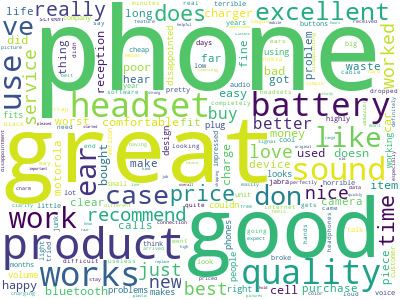

In [97]:
cloud.to_image()

In [ ]:
# cloud.to_file(파일명) -> 파일내보내기. 

## TF-IDF

TermFrequency Inverse Document Frequency 

단어 문서 행렬을 의미한다. 

여러 문장에 자주 사용이 되면 그냥 사용하면 고르게 많이 나오는 단어가 중요도 높아짐

하지만 우리가 분석할 때 중요한 것은 여러 문서에 자주 나오는 것이 아닌 구분해줄 수 있는 특별한 문자가 있는지 유무가 중요함 -> 이때 사용하는 기법임 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(stop_words='english', 
                        lowercase=True,
                        max_features=500)

In [24]:
tdm = tfidf.fit_transform(content)

In [25]:
tdm

<1000x500 sparse matrix of type '<class 'numpy.float64'>'
	with 3445 stored elements in Compressed Sparse Row format>

In [26]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

C:\Users\hyoun\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [27]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
315,phone,52.527405
189,great,42.943438
185,good,31.020654
338,product,25.804339
493,works,23.866009


## 한국어 TDM

### Naver Sentiment Movie Corpus 다운로드

In [28]:
# 한국어는 형태소로 분석해야 한다는 사실만 다를 뿐 나머지는 동일하다. 
import requests

In [129]:
res = requests.get('https://github.com/e9t/nsmc/raw/master/ratings_train.txt') # 15만개의 훈련용 데이터 존재 

In [130]:
with open('nsmc_train.csv', 'wb') as f:
    f.write(res.content)

In [131]:
nsmc = pd.read_csv('nsmc_train.csv', sep='\t')

In [98]:
len(nsmc)

150000

In [32]:
nsmc.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 토큰화 함수

In [33]:
import stanfordnlp

In [34]:
nlp = stanfordnlp.Pipeline(lang='ko', treebank='ko_gsd')

Use device: gpu
---
Loading: tokenize
With settings: 
{'model_path': 'C:\\Users\\hyoun\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_tokenizer.pt', 'lang': 'ko', 'shorthand': 'ko_gsd', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': 'C:\\Users\\hyoun\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_tagger.pt', 'pretrain_path': 'C:\\Users\\hyoun\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd.pretrain.pt', 'lang': 'ko', 'shorthand': 'ko_gsd', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': 'C:\\Users\\hyoun\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_lemmatizer.pt', 'lang': 'ko', 'shorthand': 'ko_gsd', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': 'C:\\Users\\hyoun\\stanfordnlp_resources\\ko_gsd_models\\ko_gsd_parser.pt', 'pretrain_path': 'C:\\Users\\hyoun\

In [35]:
def extract_nouns(text): # 명사추출 함수 
    doc = nlp(text)
    nouns = []
    for sentence in doc.sentences:
        for word in sentence.words:
            lemma = word.lemma.split('+')
            xpos = word.xpos.split('+')
            for lem, pos in zip(lemma, xpos):
                if pos.startswith('N') and (len(lem) > 1 or lem=='돈'):
                    yield lem


In [36]:
nsmc.loc[0, 'document']

'아 더빙.. 진짜 짜증나네요 목소리'

In [37]:
list(extract_nouns(nsmc.loc[0, 'document']))

['더빙', '진짜', '목소리']

In [38]:
cv = CountVectorizer(max_features=500, tokenizer=extract_nouns) # 한국어를 사용할때는 해당 방법을 활용해서 진행해야 한다. 형태소 분석이기 때문 

In [39]:
tdm = cv.fit_transform(nsmc.loc[0:100, 'document']) # 형태소 분석을 진행하며 하기 때문에 시간이 오래 걸린다. #주의할것. 

In [40]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

C:\Users\hyoun\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [45]:
word_count.sort_values('빈도', ascending=False).head(10)

,단어,빈도
214,영화,17
209,연기,7
223,완전,5
305,진짜,5
245,이건,4
336,평점,4
152,사람,4
317,최고,4
65,내용,4
15,갈등-,3


### 한글 글꼴

나눔 손글씨 글꼴을 다운로드 받는다. 다른 글꼴 파일(.ttf)를 사용해도 무방하다.

In [41]:
res = requests.get('https://hangeul.naver.com/webfont/NanumBrush/NanumPen.ttf')
with open('NanumPen.ttf', 'wb') as f:
    f.write(res.content) # 파일 불러와서 다운로드 (내가 원하는 이름으루!)

In [42]:
wc = WordCloud(background_color='white',
               width=400, height=300, 
               font_path='NanumPen.ttf')

In [43]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [44]:
cloud = wc.fit_words(count_dic)

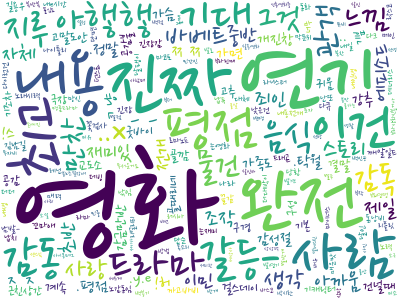

In [45]:
cloud.to_image()

## sentencepiece

### 준단어 토큰화
- 단어

- 준단어(subword) 자주나오는 조합은 하나의 단어로 취급, 기본적으로는 글자 단위이다.  

- 글자


In [46]:
!pip install sentencepiece

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [47]:
with open('review.txt', 'w', encoding='utf8') as f: # txt파일이기 때문에 w만 사용
    f.write('\n'.join(content))# 문장들을 \n을 기준으로 모두 합침. 

In [48]:
from sentencepiece import SentencePieceTrainer
# 준단어 토큰화 패키지임. 
# 사람이 잘못 입력하거나 한것도 딱히 상관 없음. 
# 구글에서 만든 패키지. 번역기에 더 우수하다. 

In [49]:
SentencePieceTrainer.Train('--input=review.txt --model_prefix=amazon_review --vocab_size=500')
# review.txt 파일을 열고 저장할 이름을 amazon_review로하고 자주 사용되는 글자를 500개까지 찾아라. 

True

In [50]:
import csv

In [51]:
tokens = pd.read_csv('amazon_review.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)

In [52]:
tokens.head(10) # 출력된 특수 문자들 unk, s /s 번역기에 주로 사용
# unk -> unknown
# s /s 문장의 시작과 끝 __빈칸 의미 뒤의 숫자는 상대빈도를 의미 클수록 자주나옴. 

,0,1
0,<unk>,0.00000
1,<s>,0.00000
2,</s>,0.00000
3,▁,-2.58317
4,.,-2.99945
5,s,-3.20645
6,t,-3.70935
7,▁the,-3.82268
8,e,-3.84017
9,▁I,-4.02138


In [53]:
from sentencepiece import SentencePieceProcessor

In [54]:
sp = SentencePieceProcessor()
sp.Load("amazon_review.model")

True

In [55]:
content[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [56]:
sp.encode_as_pieces(content[0])

['▁So',
 '▁the',
 're',
 '▁is',
 '▁no',
 '▁',
 'way',
 '▁for',
 '▁me',
 '▁to',
 '▁plug',
 '▁it',
 '▁in',
 '▁',
 'h',
 'er',
 'e',
 '▁in',
 '▁the',
 '▁',
 'U',
 'S',
 '▁',
 'un',
 'less',
 '▁I',
 '▁go',
 '▁b',
 'y',
 '▁a',
 '▁con',
 've',
 'r',
 'ter',
 '.']

In [101]:
cv = CountVectorizer(max_features=500, tokenizer=sp.encode_as_pieces)

tdm = cv.fit_transform(content)

In [104]:
count_df = pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
}).sort_values('빈도',ascending=False)
count_df

C:\Users\hyoun\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
163,▁,1281
15,.,1079
137,s,820
396,▁the,588
140,t,502
60,e,411
292,▁i,397
161,y,345
41,and,329
296,▁it,324


In [57]:
sp.encode_as_ids(content[0])

[312,
 7,
 47,
 18,
 135,
 3,
 223,
 32,
 106,
 22,
 269,
 19,
 34,
 3,
 499,
 37,
 8,
 34,
 7,
 3,
 159,
 142,
 3,
 103,
 161,
 9,
 278,
 58,
 10,
 15,
 224,
 78,
 25,
 80,
 4]

In [126]:
# 실습: 한국어 데이터 준단어 토큰화하여 TDM으로 만들어 보기. 
pd.DataFrame(nsmc.loc[0:500, 'document']).to_csv('nsmc_train_hangul.csv',index=False,encoding='utf-8')

SentencePieceTrainer.Train('--input=nsmc_train_hangul.csv --model_prefix=hangul_2 --vocab_size=1000')

True

In [122]:
sp = SentencePieceProcessor()
sp.Load("hangul_2.model")

True

In [123]:
cv = CountVectorizer(max_features=1000, tokenizer=sp.encode_as_pieces)
tdm = cv.fit_transform(nsmc.loc[0:500, 'document'])

In [124]:
count_df = pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
}).sort_values('빈도',ascending=False)
count_df

C:\Users\hyoun\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
75,▁,2548
707,이,404
288,다,255
11,.,245
140,가,193
277,는,184
307,도,172
771,지,168
173,고,156
241,나,154


In [132]:
nsmc = pd.read_csv('nsmc_train.csv',sep='\t')

with open('nsmc.txt','w',encoding='utf-8') as f:
    f.write('\n'.join(nsmc['document'].dropna()))

In [135]:
SentencePieceTrainer.Train('--input=nsmc.txt --model_prefix=hangul --vocab_size=3000')

True

In [136]:
sp = SentencePieceProcessor()
sp.Load("hangul.model")

True

In [146]:
def tokenizer(text):
    tokens = sp.encode_as_pieces(text)
    return [ t for t in tokens if len(t)>1]

In [153]:
cv = CountVectorizer(max_features=2000, tokenizer=sp.encode_as_pieces)
tdm = cv.fit_transform(nsmc['document'].dropna())

In [154]:
count_df = pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0).flat
}).sort_values('빈도',ascending=False)
count_df

C:\Users\hyoun\Anaconda3\lib\site-packages\pandas\core\dtypes\dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


,단어,빈도
105,▁,211262
17,.,70384
1654,이,49607
965,가,35765
18,..,31230
1653,의,29853
663,▁영화,28852
1189,도,28851
1147,는,27698
1016,고,26238


In [190]:
import numpy as np

In [198]:
tdm.sum(axis=0).flat

In [170]:
pd.DataFrame({
    '단어':cv.get_feature_names(),
    '빈도':tdm.sum(axis=0)
}).sort_values('빈도',ascending=False)

Exception: Data must be 1-dimensional

## 의존성 분석

In [58]:
import tqdm

In [59]:
from collections import Counter

In [155]:
doc = nlp('나는 오늘 밥을 먹었다.')

In [157]:
doc.sentences[0].words

[<Word index=1;text=나는;lemma=나+는;upos=PRON;xpos=VV+ETM;feats=_;governor=4;dependency_relation=nsubj>,
 <Word index=2;text=오늘;lemma=오늘;upos=NOUN;xpos=NNG;feats=_;governor=4;dependency_relation=nmod>,
 <Word index=3;text=밥을;lemma=밥+을;upos=NOUN;xpos=NNG+JKO;feats=_;governor=4;dependency_relation=obj>,
 <Word index=4;text=먹었다;lemma=먹+었+다;upos=VERB;xpos=VV+EP+EF;feats=_;governor=0;dependency_relation=root>,
 <Word index=5;text=.;lemma=.;upos=PUNCT;xpos=SF;feats=_;governor=4;dependency_relation=punct>]

In [188]:
dependencies = Counter()

for text in tqdm.tqdm_notebook(nsmc.loc[:99, 'document']):
    doc = nlp(text)
    for sentence in doc.sentences:
        for word in sentence.words:
            i = word.governor - 1
            if sentence.words[i].xpos.startswith('V'):
                gov = sentence.words[i].lemma.split('+')[0]
                dep = word.lemma.split('+')[0]
                dependencies[(dep, gov)] += 1

In [71]:
list(dependencies.items())

[(('아', '.'), 1),
 (('더빙', '아'), 1),
 (('.', '아'), 1),
 (('.', '.'), 6),
 (('진짜', '짜증나'), 1),
 (('짜증나', '짜증나'), 1),
 (('목소리', '목소리'), 1),
 (('흠', '...'), 1),
 (('...', '흠'), 1),
 (('포스터보', '않'), 1),
 (('초딩영화줄', '포스터보'), 1),
 (('.....', '가'), 1),
 (('가', '포스터보'), 1),
 (('않', '가'), 1),
 (('너무', '너무'), 1),
 (('교도소', '없'), 1),
 (('이야기구먼', '교도소'), 1),
 (('..솔직히', '없'), 1),
 (('재미있', '없'), 1),
 (('없', '조정'), 1),
 (('.', '없'), 2),
 (('.평점', '없'), 1),
 (('조정', '.평점'), 1),
 (('사이몬페그', '연기'), 1),
 (('익살', '연기'), 1),
 (('연기', '돋보이'), 1),
 (('돋보이', '영화'), 1),
 (('영화', '끌어보이'), 1),
 (('끌어보이', '하'), 1),
 (('하', '커스틴'), 1),
 (('커스틴', '이뻐보이'), 1),
 (('던스트', '커스틴'), 1),
 (('너무나도', '이뻐보이'), 1),
 (('이뻐보이', '이뻐보이'), 1),
 (('막', '걸음마'), 1),
 (('걸음마', '뗀'), 1),
 (('뗀', '3'), 1),
 (('3', '아까움'), 1),
 (('초등학교', '8'), 1),
 (('1', '초등학교'), 1),
 (('8', '.'), 1),
 (('.', '8'), 1),
 (('.', '아까움'), 2),
 (('아까움', '.'), 2),
 (('원작', '긴장감'), 1),
 (('긴장감', '살려'), 1),
 (('제대로', '살려'), 1),
 (('살려', '.'), 1),
 (('.', '살려'

In [199]:
dep_df = pd.DataFrame(list(dependencies.items()), columns=['의존관계', '빈도'])

In [200]:
dep_df.sort_values('빈도', ascending=False).head(5)

,의존관계,빈도
78,"(절대, 아니)",3
140,"(없, 없)",3
92,"(있, 있)",2
42,"(진짜, 보)",2
143,"(하나, 없)",2
